In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pickle

In [2]:
supplies = pd.read_csv('Supplies.csv', parse_dates=[0], index_col=[0])

In [3]:
supplies.head()

,supplies
date,
2019-01-01,35
2019-01-02,32
2019-01-03,30
2019-01-04,31
2019-01-05,44


In [4]:
f_supplies = supplies.iloc[:, [0]]

In [5]:
f_supplies.head()

,supplies
date,
2019-01-01,35
2019-01-02,32
2019-01-03,30
2019-01-04,31
2019-01-05,44


In [6]:
type(f_supplies)

pandas.core.frame.DataFrame

In [7]:
series_value = f_supplies.values

In [8]:
type(series_value)

numpy.ndarray

In [9]:
f_supplies.size

365

In [10]:
f_supplies.tail()

,supplies
date,
2019-12-27,37
2019-12-28,52
2019-12-29,48
2019-12-30,55
2019-12-31,50


In [11]:
f_supplies.describe()

,supplies
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


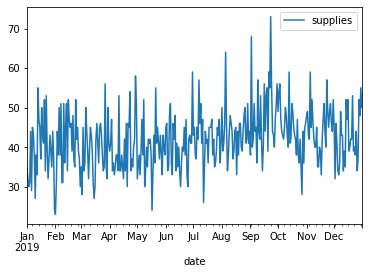

In [12]:
f_supplies.plot()

In [13]:
f_supplies_mean = f_supplies.rolling(window = 50).mean()

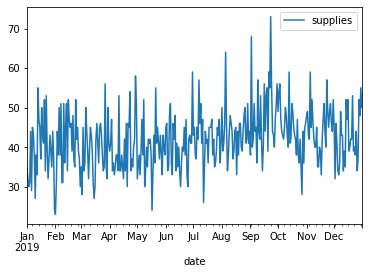

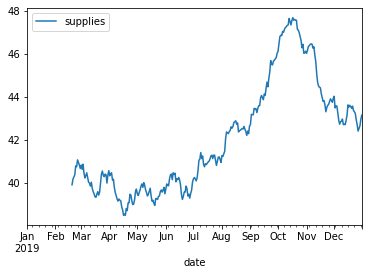

In [14]:
f_supplies.plot()
f_supplies_mean.plot()

In [15]:
value = pd.DataFrame(series_value)

In [16]:
supplies_df = pd.concat([value, value.shift(1)], axis=1)

In [17]:
supplies_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [18]:
supplies_df.columns = ['Actual_usage', 'Forecast_usage']

In [19]:
supplies_df.head()

,Actual_usage,Forecast_usage
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [20]:
supplies_test = supplies_df[1:]

In [21]:
supplies_test.head()

,Actual_usage,Forecast_usage
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [22]:
supplies_error = mean_squared_error(supplies_test.Actual_usage, supplies_test.Forecast_usage)

In [23]:
supplies_error

84.22252747252747

In [24]:
np.sqrt(supplies_error)

9.177283229394606

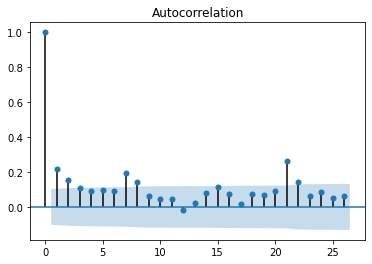

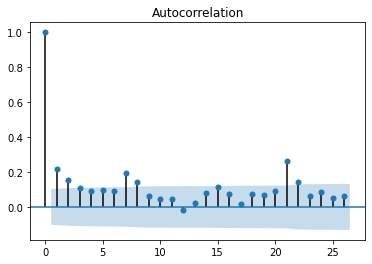

In [25]:
# plot_acf is to identify parameter Q
# ARIMA(p, d, q)

plot_acf(f_supplies)

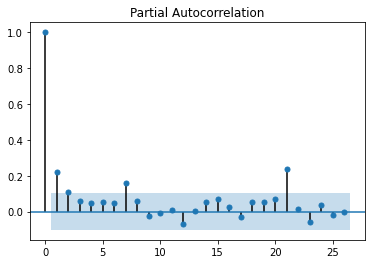

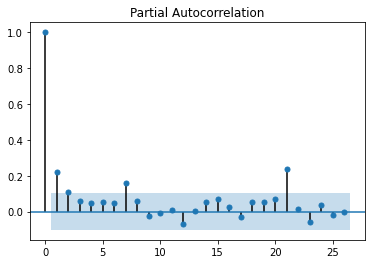

In [26]:
# to identify the value of p

plot_pacf(f_supplies)

In [27]:
f_supplies.size

365

In [28]:
# p=2,3 d=0 q=3,4

supplies_train = f_supplies[0:330]
supplies_test = f_supplies[330:365]

In [29]:
supplies_model = ARIMA(supplies_train, order=(2, 1, 3))

C:\Users\Piyumal\anaconda3\envs\py38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Piyumal\anaconda3\envs\py38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [30]:
supplies_model_fit = supplies_model.fit()

In [31]:
supplies_model_fit.aic

2230.94826732608

In [32]:
supplies_forecast = supplies_model_fit.forecast(steps = 35)[0]

In [33]:
supplies_forecast

array([45.30410968, 46.31015188, 43.64995676, 44.59286094, 46.49676613,
       44.3436888 , 44.09058786, 46.34387252, 45.07537646, 43.88174576,
       45.9523748 , 45.69573804, 43.97453342, 45.4571645 , 46.10379536,
       44.3117526 , 44.99286458, 46.26033206, 44.79375835, 44.66529058,
       46.18601477, 45.30662938, 44.5337438 , 45.94711039, 45.74871494,
       44.60610618, 45.63388142, 46.05018979, 44.84566312, 45.33745647,
       46.18262093, 45.18626768, 45.1303386 , 46.15816499, 45.55124823])

In [34]:
supplies_test

,supplies
date,
2019-11-27,51
2019-11-28,46
2019-11-29,44
2019-11-30,52
2019-12-01,45
2019-12-02,32
2019-12-03,46
2019-12-04,41
2019-12-05,34


In [35]:
np.sqrt(mean_squared_error(supplies_test, supplies_forecast))

6.860053178833604

In [42]:
# saving model to disk

#pickle.dump([supplies_model_fit, supplies_forecast], open('model.pkl', 'wb'))

with open('model.pickle', 'wb') as f:
    pickle.dump([supplies_test, supplies_forecast, supplies_model_fit], f)

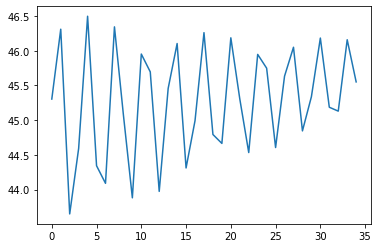

In [43]:
plt.plot(supplies_forecast)

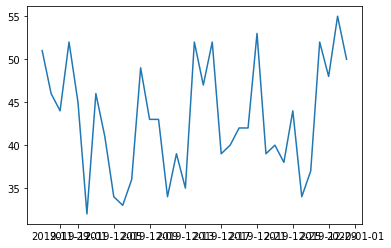

In [44]:
plt.plot(supplies_test)